# Lab 1: Gradient descent
Author : Pierre Ablin

In this lab, the goal is to implement gradient descent, and look at its behavior. We will implement it for the ridge regression.


In the following, `X` is a $n\times p$ matrix and $y$ a vector of size `n`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 10
p = 5
X = np.random.randn(n, p)
y = np.random.randn(n)
w = np.random.randn(p)
lbda = 0.5

**Exercise 1**: Implement an algorithm that computes the value of the ridge regression function, and of its gradient. Verify by finite difference that it is correct.

$$\min_w \frac12\|Xw - y\|^2 + \frac\lambda 2\|w\|^2$$

In [2]:
def ridge_cost(w, X, y, lbda):
    # your code here
    residual = np.dot(X, w) - y
    cost = .5 * residual.dot(residual) + .5 * lbda * w.dot(w)
    return cost


def ridge_gradient(w, X, y, lbda):
    # your code here
    grad = np.dot(X.T, np.dot(X, w) - y) + lbda * w
    return grad

In [3]:
from scipy.optimize import check_grad

check_grad(ridge_cost, ridge_gradient, w, X, y, lbda)  # should be small ! :)

7.633123235074743e-07

**Exercise 2**: Implement an algorithm that computes the optimal value $w^*$ in closed form. Check that it works: it should cancel the gradient !

In [4]:
def ridge_closed_form(X, y, lbda):
    n, p = X.shape
    # Your code here
    
    w = np.linalg.solve(np.dot(X.T, X) + lbda * np.eye(p), np.dot(X.T, y))
    return w

In [5]:
w_star = ridge_closed_form(X, y, lbda)
print(ridge_gradient(w_star, X, y, lbda))  # should be small

[ 1.66533454e-16 -4.71844785e-16 -4.16333634e-16  1.58206781e-15
  1.11022302e-15]


**Exercise 3** Implement gradient descent with a step size `step` for `n_iters` iterations, starting from $w^0=0$.  Display the evolution of $f(x_n) - f^*$ and $\|x_n - x^*\|$ for this problem, with 100 iterations and the classical step size $1/L$.

In [6]:
def ridge_gradient_descent(X, y, lbda, step, n_iters):
    n, p = X.shape
    w = np.zeros(p)
    w_list = []
    for i in range(n_iters):
        w_list.append(w.copy())
        # your code here
        w = w - step * ridge_gradient(w, X, y, lbda)
    return w, w_list  # returns the value of w and the list of iterates

In [7]:
step = 1 / (np.linalg.norm(X, ord=2) ** 2 + lbda)
n_iters = 100
w, w_list = ridge_gradient_descent(X, y, lbda, step, n_iters)

Text(0, 0.5, 'f - f^*')

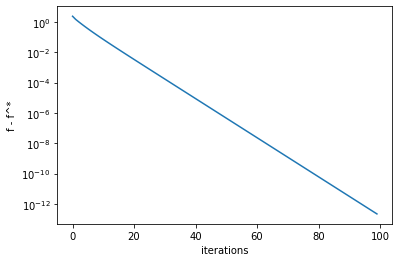

In [8]:
f_star = ridge_cost(w_star, X, y, lbda)
f_vals = [ridge_cost(w, X, y, lbda) - f_star for w in w_list]

plt.semilogy(f_vals)
plt.xlabel('iterations')
plt.ylabel('f - f^*')

Text(0, 0.5, '||x - x^*||')

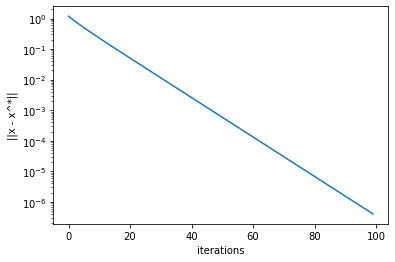

In [9]:
dists = [np.linalg.norm(w - w_star) for w in w_list]

plt.semilogy(dists)
plt.xlabel('iterations')
plt.ylabel('||x - x^*||')

**Exercice 4** Give the formula for the conditioning of the problem. Write a function that computes the condition number given $X, y$ and $\lambda$. 

**Answer** : the function is quadratic. Its Hessian is $H = X^{\top}X + \lambda I_p$. Hence, its conditioning is $\kappa = \frac{\sigma_{\min}(X) + \lambda}{\sigma_{\max}(X) + \lambda}$.

To have a very well conditioned problem, we can simply take a large $\lambda$.

In [10]:
def conditioning(X, lbda):
    # your code here
    _, sigma, _ = np.linalg.svd(X)
    kappa = (np.min(sigma) ** 2 + lbda) / (np.max(sigma) ** 2 + lbda)
    return kappa

**Exercice 5** Generate a problem with $n=50$, $p=100$ where the conditioning is $~0.5$, and another problem where the conditioning is $~1 / 1000$. Compare the convergence curves on these problems.

0.4945397930843411


Text(0.5, 1.0, 'Well conditioned')

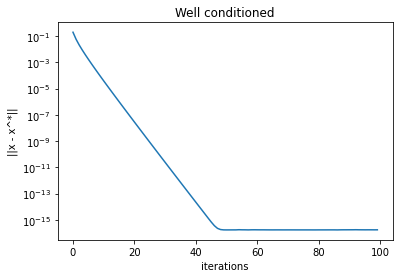

In [11]:
n, p = 50, 100

y = np.random.randn(n)

# your code here
X_well_conditioned = np.random.randn(n, p)
lbda_well = 250
print(conditioning(X_well_conditioned, lbda_well))

step = 1 / (np.linalg.norm(X_well_conditioned, ord=2) ** 2 + lbda_well)
w_star = ridge_closed_form(X_well_conditioned, y, lbda_well)
n_iters = 100
w, w_list_well = ridge_gradient_descent(X_well_conditioned, y, lbda_well, step, n_iters)

dists = [np.linalg.norm(w - w_star) for w in w_list_well]

plt.semilogy(dists)
plt.xlabel('iterations')
plt.ylabel('||x - x^*||')
plt.title('Well conditioned')

In order to get a very bad conditioning, we can generate a very badly conditioned matrix $X$ as $U\Sigma V$ where $U$, $V$ are random orthogonal matrices and $\Sigma$ is badly conditioned.

9.999999999999992e-05


Text(0.5, 1.0, 'Poorly conditioned')

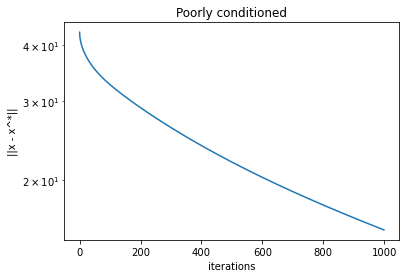

In [12]:
n, p = 50, 100

y = np.random.randn(n)

# your code here
singular_values = np.linspace(1e-4, 1, n)
U, _, V = np.linalg.svd(np.random.randn(n, p), full_matrices=False)
X_bad = np.dot(U * singular_values, V)
lbda_bad = 1e-4

print(conditioning(X_bad, lbda_bad))

step = 1 / (np.linalg.norm(X_bad, ord=2) ** 2 + lbda_bad)
w_star = ridge_closed_form(X_bad, y, lbda_bad)
n_iters = 1000
w, w_list_bad = ridge_gradient_descent(X_bad, y, lbda_bad, step, n_iters)

dists = [np.linalg.norm(w - w_star) for w in w_list_bad]

plt.semilogy(dists)
plt.xlabel('iterations')
plt.ylabel('||x - x^*||')
plt.title('Poorly conditioned')

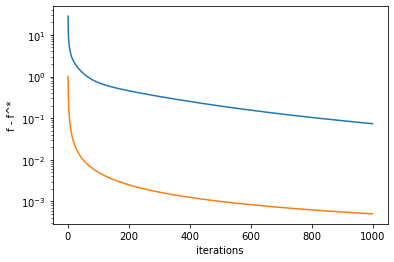

In [13]:
f_star = ridge_cost(w_star, X_bad, y, lbda_bad)
f_vals = [ridge_cost(w, X_bad, y, lbda_bad) - f_star for w in w_list_bad]

plt.semilogy(f_vals)
plt.xlabel('iterations')
plt.ylabel('f - f^*')
plt.semilogy(1 / (2 * np.arange(n_iters) + 1))